# // Importing libraries //

In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline, FeatureUnion # These ones are new!
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, Imputer

%matplotlib inline

sns.set_style('darkgrid')

# // Reading in the data //

In [175]:
train = pd.read_csv('train.csv')
train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000


In [176]:
test = pd.read_csv('test.csv')
test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New


# // EDA + Cleaning //

In [177]:
# First I want the column names to be uniformly formatted just for consistency.

train.rename(columns= {col: col.lower().replace(' ','_') for col in train.columns}, inplace=True)
test.rename(columns= {col: col.lower().replace(' ','_') for col in test.columns}, inplace=True)

In [178]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

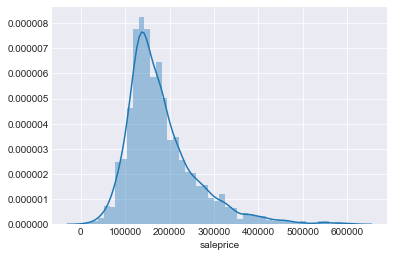

In [179]:
sns.distplot(train.saleprice);

In [180]:
train.saleprice.sort_values(ascending=False);

In [181]:
train.dtypes;

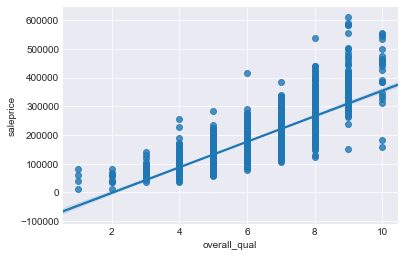

In [182]:
sns.regplot(train.overall_qual, train.saleprice);

In [183]:
train.isnull().sum().sort_values(ascending = False);

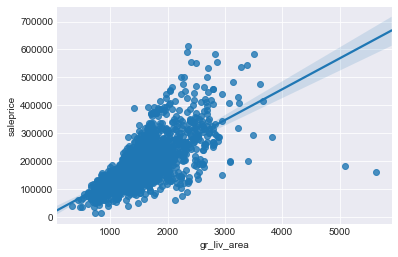

In [184]:
sns.regplot(train.gr_liv_area ,train.saleprice);

In [185]:
train.loc[train.gr_liv_area > 5000, :]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


In [186]:
train.shape

(2051, 82)

In [187]:
# Gonna drop those two outliers and see what happens
train.drop([960, 1885], axis=0, inplace=True)

In [188]:
train.shape

(2049, 82)

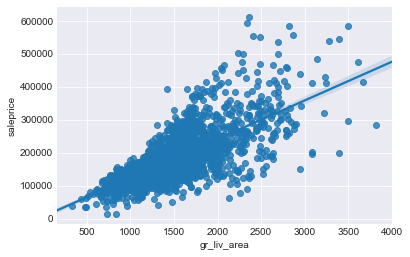

In [189]:
sns.regplot(train.gr_liv_area,train.saleprice);
# Think that's looking better for that one

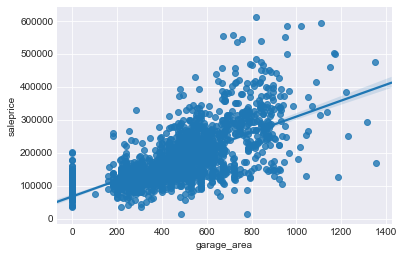

In [190]:
sns.regplot(train.garage_area,train.saleprice); # Maybe

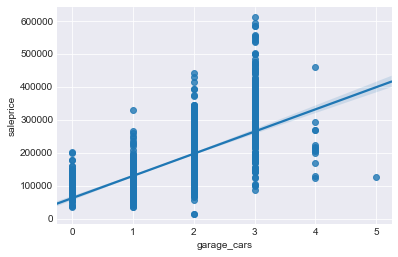

In [191]:
sns.regplot(train.garage_cars,train.saleprice); #Nah

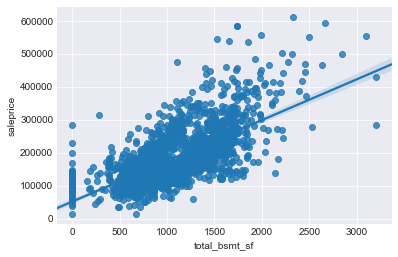

In [192]:
sns.regplot(train.total_bsmt_sf,train.saleprice); # Maybe

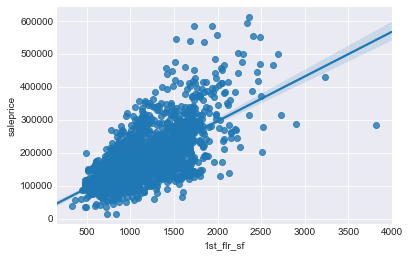

In [193]:
sns.regplot(train['1st_flr_sf'], train.saleprice);

In [194]:
train.loc[train['1st_flr_sf'] > 3000, :]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
328,1773,528366050,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [195]:
# Gonna drop those two outliers and see what happens
train.drop([328, 616], axis=0, inplace=True)

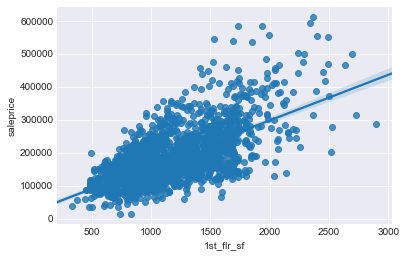

In [196]:
sns.regplot(train['1st_flr_sf'], train.saleprice); # Yup

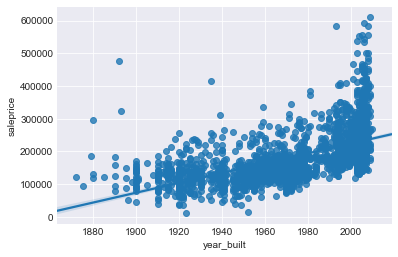

In [197]:
sns.regplot(train['year_built'], train.saleprice); # Nah

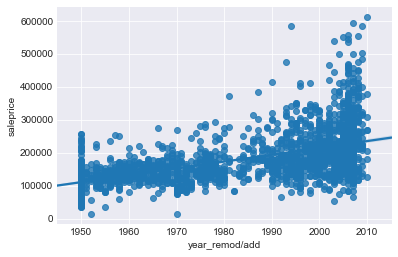

In [198]:
sns.regplot(train['year_remod/add'], train.saleprice); # Nah

### Let's change some of those objects to ints or floats before checking correlation again

In [199]:
# So far dropping 'pool_qc' , 'misc_feature' , 'alley' , 'fence', and 'fireplace_qu' since basically at least 
# 3/4 of the data is a null or missing value.

train.drop(['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu'], axis=1, inplace=True)
train.shape

(2047, 77)

In [200]:
train.dtypes;

In [201]:
simple_qual_encoded = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
    np.nan: 0
}
train['exter_qual'] = train['exter_qual'].map(simple_qual_encoded)
train['exter_cond'] = train['exter_cond'].map(simple_qual_encoded)
train['kitchen_qual'] = train['kitchen_qual'].map(simple_qual_encoded)
train['garage_cond'] = train['garage_cond'].map(simple_qual_encoded)
train['garage_qual'] = train['garage_qual'].map(simple_qual_encoded)
train['bsmt_cond'] = train['bsmt_cond'].map(simple_qual_encoded)
train['bsmt_qual'] = train['bsmt_qual'].map(simple_qual_encoded)
train['heating_qc'] = train['heating_qc'].map(simple_qual_encoded)

In [202]:
train.street.value_counts()

Pave    2040
Grvl       7
Name: street, dtype: int64

In [203]:
street_encoder = {
    'Pave': 1,
    'Grvl': 0
}
train['street'] = train['street'].map(street_encoder)

In [204]:
train.lot_shape.value_counts()

Reg    1295
IR1     689
IR2      55
IR3       8
Name: lot_shape, dtype: int64

In [205]:
train.shape

(2047, 77)

In [206]:
train.dropna(subset=['lot_frontage'], how='any', inplace=True)

In [207]:
train.isnull().sum().sort_values(ascending = False);

In [208]:
lot_shape_encoder = {
    'Reg': 4,
    'IR1': 3,
    'IR2': 2,
    'IR3': 1,
    np.nan: 0
}
train['lot_shape'] = train['lot_shape'].map(lot_shape_encoder)

In [209]:
train.land_contour.value_counts()

Lvl    1547
HLS      78
Bnk      69
Low      24
Name: land_contour, dtype: int64

In [210]:
land_contour_encoder = {
    'Lvl': 4,
    'HLS': 3,
    'Bnk': 2,
    'Low': 1,
    np.nan: 0
}
train['land_contour'] = train['land_contour'].map(land_contour_encoder)

In [211]:
train.garage_finish.value_counts()

Unf    723
RFn    477
Fin    410
Name: garage_finish, dtype: int64

In [212]:
garage_finish_encoder = {
    'Fin': 3,
    'Rfn': 2,
    'Unf': 1,
    np.nan: 0
}
train['garage_finish'] = train['garage_finish'].map(garage_finish_encoder)

In [213]:
train.utilities.value_counts() # Not even worth doing

AllPub    1717
NoSewr       1
Name: utilities, dtype: int64

In [214]:
train.land_slope.value_counts()

Gtl    1642
Mod      72
Sev       4
Name: land_slope, dtype: int64

In [215]:
land_slope_encoder = {
    'Gtl': 3,
    'Mod': 2,
    'Sev': 1,
    np.nan: 0
}
train['land_slope'] = train['land_slope'].map(land_slope_encoder)

In [216]:
paved_drive_encoder = {
    'Y': 2,
    'P': 1,
    'N': 0,
    np.nan: 0
}
train['paved_drive'] = train['paved_drive'].map(land_slope_encoder)

In [217]:
centralair_encoder = {
    'Y': 1,
    'N': 0,
    np.nan: 0
}
train['central_air'] = train['central_air'].map(centralair_encoder)

In [218]:
train['neighborhood'] = train['neighborhood'].astype('category')
train = pd.get_dummies(train, columns = ['neighborhood'], drop_first = True)

train['condition_1'] = train['condition_1'].astype('category')
train = pd.get_dummies(train, columns = ['condition_1'], drop_first = True)

train['roof_matl'] = train['roof_matl'].astype('category')
train = pd.get_dummies(train, columns = ['roof_matl'], drop_first = True)

train['exterior_1st'] = train['exterior_1st'].astype('category')
train = pd.get_dummies(train, columns = ['exterior_1st'], drop_first = True)

train['mas_vnr_type'] = train['mas_vnr_type'].astype('category')
train = pd.get_dummies(train, columns = ['mas_vnr_type'], drop_first = True)

train['foundation'] = train['foundation'].astype('category')
train = pd.get_dummies(train, columns = ['foundation'], drop_first = True)

train['electrical'] = train['electrical'].astype('category')
train = pd.get_dummies(train, columns = ['electrical'], drop_first = True)

In [219]:
train.bsmtfin_type_1.value_counts() #Guess we need to encode this one

Unf    538
GLQ    494
ALQ    237
Rec    161
BLQ    157
LwQ     86
Name: bsmtfin_type_1, dtype: int64

In [220]:
bsmt_fin_encoder = {
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    'NA':0,
    np.nan: 0
}
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].map(bsmt_fin_encoder)

In [221]:
train.functional.value_counts()

Typ     1607
Min1      34
Min2      34
Mod       24
Maj1       9
Maj2       7
Sal        2
Sev        1
Name: functional, dtype: int64

In [222]:
functional_encoder = {
    'Typ':7,
    'Min1':6,
    'Min2':5,
    'Mod':4,
    'Maj1':3,
    'Maj2':2,
    'Sev':1,
    'Sal': 0
}
train['functional'] = train['functional'].map(functional_encoder)

In [223]:
train.dropna(subset=['bsmt_unf_sf'], how='any', inplace=True)

train.dropna(subset=['garage_finish'], how='any', inplace=True)

train.dropna(subset=['bsmt_exposure'], how='any', inplace=True)

train.dropna(subset=['bsmtfin_type_2'], how='any', inplace=True)

train.dropna(subset=['mas_vnr_area'], how='any', inplace=True)

In [224]:
train.isnull().sum().sort_values(ascending=False); # NO NULLS LEFT

In [249]:
train.corr()['saleprice'].abs().sort_values(ascending=False)

saleprice               1.000000
overall_qual            0.819174
exter_qual              0.745058
gr_liv_area             0.718500
total_bsmt_sf           0.710026
1st_flr_sf              0.706928
kitchen_qual            0.705812
bsmt_qual               0.695808
garage_area             0.656612
garage_cars             0.655128
garage_finish           0.628455
year_built              0.565206
mas_vnr_area            0.557427
full_bath               0.545423
garage_yr_blt           0.537659
year_remod/add          0.535464
foundation_PConc        0.534320
neighborhood_NridgHt    0.528106
totrms_abvgrd           0.515760
fireplaces              0.512903
bsmtfin_sf_1            0.471358
mas_vnr_type_None       0.459404
heating_qc              0.441020
lot_area                0.440434
lot_frontage            0.371249
mas_vnr_type_Stone      0.367169
lot_shape               0.359544
neighborhood_StoneBr    0.355779
foundation_CBlock       0.350235
bsmtfin_type_1          0.340750
open_porch

In [226]:
pd.set_option('display.max_rows', 140)

In [227]:
train.dtypes;

In [228]:
train.ms_zoning.value_counts()

RL         852
RM         270
FV          41
C (all)     15
RH          11
Name: ms_zoning, dtype: int64

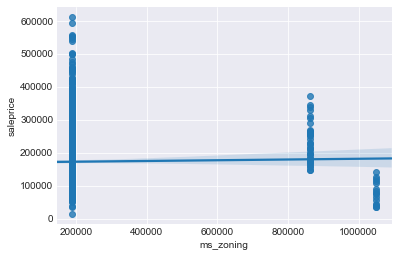

In [229]:
# Revisit this later

# Trying something crazy for zoning, basically the average value of each kind of property encoded.

zoning_encoded = {
    'A (agr)': 29962,
    'RL': 189095,
    'RM': 189095,
    'RH': 189095,
    'FV': 861565,
    'C (all)': 1049943,
    'I (all)': 4790893,
    np.nan: 0
}

train['ms_zoning'] = train['ms_zoning'].map(zoning_encoded)

train.ms_zoning.value_counts()

sns.regplot(train['ms_zoning'], train.saleprice);

# // Need to clean the test data same way //

In [230]:
test.drop(['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu'], axis=1, inplace=True)

In [231]:
test['exter_qual'] = test['exter_qual'].map(simple_qual_encoded)
test['exter_cond'] = test['exter_cond'].map(simple_qual_encoded)
test['kitchen_qual'] = test['kitchen_qual'].map(simple_qual_encoded)
test['garage_cond'] = test['garage_cond'].map(simple_qual_encoded)
test['garage_qual'] = test['garage_qual'].map(simple_qual_encoded)
test['bsmt_cond'] = test['bsmt_cond'].map(simple_qual_encoded)
test['bsmt_qual'] = test['bsmt_qual'].map(simple_qual_encoded)
test['heating_qc'] = test['heating_qc'].map(simple_qual_encoded)
test['street'] = test['street'].map(street_encoder)
test['lot_shape'] = test['lot_shape'].map(lot_shape_encoder)
test['land_contour'] = test['land_contour'].map(land_contour_encoder)
test['garage_finish'] = test['garage_finish'].map(garage_finish_encoder)
test['land_slope'] = test['land_slope'].map(land_slope_encoder)
test['paved_drive'] = test['paved_drive'].map(land_slope_encoder)
test['central_air'] = test['central_air'].map(centralair_encoder)
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].map(bsmt_fin_encoder)
test['functional'] = test['functional'].map(functional_encoder)

In [232]:
test['neighborhood'] = test['neighborhood'].astype('category')
test = pd.get_dummies(test, columns = ['neighborhood'], drop_first = True)

test['condition_1'] = test['condition_1'].astype('category')
test = pd.get_dummies(test, columns = ['condition_1'], drop_first = True)

test['roof_matl'] = test['roof_matl'].astype('category')
test = pd.get_dummies(test, columns = ['roof_matl'], drop_first = True)

test['exterior_1st'] = test['exterior_1st'].astype('category')
test = pd.get_dummies(test, columns = ['exterior_1st'], drop_first = True)

test['mas_vnr_type'] = test['mas_vnr_type'].astype('category')
test = pd.get_dummies(test, columns = ['mas_vnr_type'], drop_first = True)

test['foundation'] = test['foundation'].astype('category')
test = pd.get_dummies(test, columns = ['foundation'], drop_first = True)

test['electrical'] = test['electrical'].astype('category')
test = pd.get_dummies(test, columns = ['electrical'], drop_first = True)

In [233]:
# test.dropna(subset=['lot_frontage'], how='any', inplace=True)
# test.dropna(subset=['bsmt_unf_sf'], how='any', inplace=True)
# test.dropna(subset=['garage_finish'], how='any', inplace=True)
# test.dropna(subset=['bsmt_exposure'], how='any', inplace=True)
# test.dropna(subset=['bsmtfin_type_2'], how='any', inplace=True)
# test.dropna(subset=['mas_vnr_area'], how='any', inplace=True)

# // Time to model //

In [250]:
featuresz_with_corr_over_50 = [
'overall_qual',
'exter_qual',
'gr_liv_area',
'total_bsmt_sf',
'1st_flr_sf',
'kitchen_qual',
'bsmt_qual',
'garage_area',
'garage_cars',
'garage_finish',
'year_built',
'mas_vnr_area',
'full_bath',
'garage_yr_blt',
'year_remod/add',
'foundation_PConc',
'neighborhood_NridgHt',
'totrms_abvgrd',
'fireplaces'
]

In [262]:
top_10_corr_features = [
'overall_qual',
'exter_qual',
'gr_liv_area',
'total_bsmt_sf',
'1st_flr_sf',
'kitchen_qual',
'bsmt_qual',
'garage_area',
'garage_cars',
'garage_finish'
]

In [285]:
top_5_corr_features = [
'overall_qual',
'exter_qual',
'gr_liv_area',
'total_bsmt_sf',
'1st_flr_sf'
]

In [311]:
y = train['saleprice']

# Feature to exclude:
# ['saleprice', 'sale_type', 'sale_condition', 'heating', 'garage_type', 'house_style', 'ms_zoning', 'utilities', 'id', 'pid', 'lot_config', 'roof_style', 'exterior_2nd', 'bsmt_exposure', 'bsmtfin_type_2', 'condition_2', 'bldg_type']

features = [col for col in train.columns if col not in ['saleprice', 'sale_type', 'sale_condition', 'heating', 'garage_type', 'house_style', 'ms_zoning', 'utilities', 'id', 'pid', 'lot_config', 'roof_style', 'exterior_2nd', 'bsmt_exposure', 'bsmtfin_type_2', 'condition_2', 'bldg_type']]

X = train[top_5_corr_features]

In [312]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state = 42)

In [313]:
poly = PolynomialFeatures(include_bias=False)
poly.fit_transform(X_train).shape

(891, 20)

In [314]:
imp = Imputer() # Will deal with NaNs
poly = PolynomialFeatures(include_bias=False)
ss = StandardScaler()

lasso = Lasso(max_iter=2500)
ridge = Ridge(max_iter=2000)
enet = ElasticNet()

pipe = Pipeline([                               # Things need to be in order like a factory
#     ('features', features),
    ('imp', imp),
    ('poly', poly),
    ('ss', ss),
    ('lasso', lasso),
#     ('ridge', ridge)
])

In [315]:
params = {
    'imp__strategy': ['mean', 'median','most_frequent'],
    'lasso__alpha': np.arange(.001, .15, .0025),
#     'ridge__alpha': np.logspace(0, 5, 200),
#     'enet__l1_ratio': [.1, .5, .7,.9, .95, .99, 1]
}
rs = RandomizedSearchCV(pipe, param_distributions=params, n_iter=10)
rs.fit(X_train, y_train)
print (rs.best_score_)
print (rs.best_params_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.873660442574
{'lasso__alpha': 0.0035000000000000001, 'imp__strategy': 'most_frequent'}


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [316]:
X_test = test[top_5_corr_features]

In [317]:
test.shape

(879, 139)

In [241]:
test['neighborhood_GrnHill'] = [0 for x in range(1, 880)]
test['neighborhood_Landmrk'] = [0 for x in range(1, 880)]
test['ms_zoning_C (all)'] = [0 for x in range(1, 880)]
test['roof_matl_Membran'] = [0 for x in range(1, 880)]
test['exterior_1st_CBlock'] = [0 for x in range(1, 880)]
test['exterior_1st_ImStucc'] = [0 for x in range(1, 880)]
test['exterior_1st_Stone'] = [0 for x in range(1, 880)]
test['electrical_Mix'] = [0 for x in range(1, 880)]

In [318]:
predictions = rs.best_estimator_.predict(X_test)

test['SalePrice'] = predictions

test = test.rename(columns={'id': 'Id'})

test.head(3)

In [322]:
test[['Id', 'SalePrice']].to_csv('p2_reg_16.csv', index=False)

In [323]:
submission = pd.read_csv('p2_reg_16.csv')
submission.head(30)

,Id,SalePrice
0,2658,186081.650340
1,2718,171663.164073
2,2414,165447.840117
3,1989,125592.782980
4,625,169770.883446
5,333,93350.658253
6,1327,109582.958994
7,858,140038.813655
8,95,194826.885909
9,1568,159813.887935
